# 차원축소 Assignment2_Tobigs14_이혜린 
  
차원축소의 장점
- 훈련 알고리즘의 속도를 높인다.
- 데이터를 시각화하고 가장 중요한 특성에 대한 통찰을 얻을 수 있다.
- 메모리 공간을 절약할 수 있다.
  
차원축소의 단점
- 정보 손실로 훈련 알고리즘의 성능이 감소할 수 있다.
- 계산 비용이 높다.
- 머신러닝 파이프라인의 복잡도를 증가시킨다.
- 변환된 데이터를 이해하기 어려운 경우가 많다.

## MNIST data에 적용을 해보기 (╹◡╹)

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [3]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings('ignore')

In [7]:
mnist = io.loadmat('/content/drive/My Drive/Tobigs14/Week5_Dimensionality Reduction/mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

In [ ]:
# 데이터 정보!
# 7만개의 작은 숫자 이미지
# 행 열이 반대로 되어있음 -> 전치
# grayscale 28x28 pixel = 784 feature
# 각 pixel은 0~255의 값
# label = 1~10 label이 총 10개인거에 주목하자

In [ ]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [ ]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [ ]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

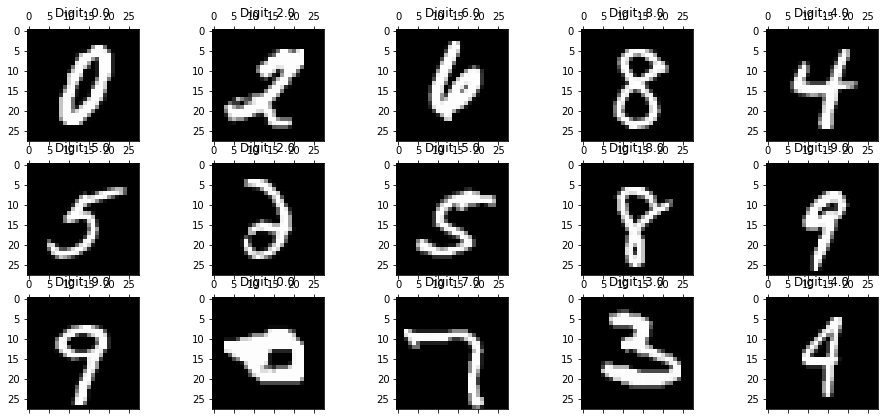

In [ ]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['y'], axis=1), df['y'], test_size=0.2, random_state=123)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(56000, 784) (14000, 784)
(56000,) (14000,)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!
강의에서 배웠던 3가지 중 어떤 걸 고려하였는지요! 
scree plot같은거는 직접 그려봐도 좋겠죠 ㅎㅎㅎ

#### PCA로 주성분 개수 정하기

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(X_train)
var_cum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(var_cum > 0.8) + 1  # 설명하려하는 분산의 비율 80%
print(d)

43


분산의 80%를 설명하기 위해 필요한 주성분 개수는 **43개**이다.

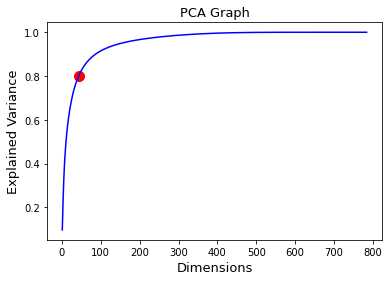

In [ ]:
plt.plot(list(range(1, 1+len(var_cum))), var_cum, color='b')
plt.title('PCA Graph', fontsize=13)
plt.xlabel('Dimensions', fontsize=13)
plt.ylabel('Explained Variance', fontsize=13)
plt.scatter(d, 0.8, s=100, c='red')
plt.show()

Dimension이 약 100일 때가 elbow point로 보인다.

#### PCA로 차원 축소한 결과 (Dimensions 43)

In [ ]:
pca_final=PCA(n_components=43)
X_train_pca = pca_final.fit_transform(X_train) # 주성분 43개로 차원 축소된 X_train

In [ ]:
X_test_pca = pca_final.transform(X_test) # 주성분 43개로 차원 축소된 X_test

#### LDA로 주성분 개수 정하기

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
var_cum_lda = np.cumsum(lda.explained_variance_ratio_)
d = np.argmax(var_cum_lda>0.8)+1 # 설명 하려는 분산의 비율 80%
print(d)

5


분산의 80%를 설명하기 위해 필요한 주성분 개수는 **5개**이다.

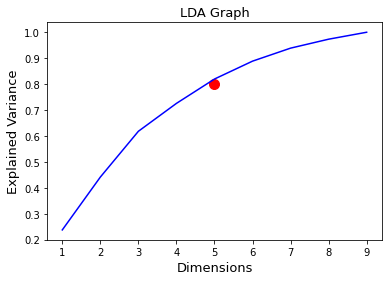

In [ ]:
plt.plot(list(range(1, 1+len(var_cum_lda))), var_cum_lda, color='b')
plt.title('LDA Graph', fontsize=13)
plt.xlabel('Dimensions', fontsize=13)
plt.ylabel('Explained Variance', fontsize=13)
plt.scatter(d, 0.8, s=100, c='red')
plt.show()

눈에 띄는 elbow point가 보이지는 않는다.

#### LDA로 차원축소한 결과 (Dimensions 5)

In [ ]:
lda_final = LinearDiscriminantAnalysis(n_components=5)
X_train_lda = lda_final.fit_transform(X_train, y_train) # 주성분 5개로 차원 축소된 X_train (fit 할 때 y_train 필요)

In [ ]:
X_test_lda = lda_final.transform(X_test) # 주성분 5개로 차원 축소된 X_test (fit 할 때 y_train 필요)

#### LDA로 차원축소한 결과 (Dimensions 43)  
  
Dimensions이 같을 때 PCA와 비교하기 위해서 생성했다.

In [ ]:
lda_extra = LinearDiscriminantAnalysis(n_components=43)
X_train_extra = lda_extra.fit_transform(X_train, y_train) # 주성분 43개로 차원 축소된 X_train (fit 할 때 y_train 필요)
X_test_extra = lda_extra.transform(X_test) # 주성분 43개로 차원 축소된 X_test (fit 할 때 y_train 필요)

#### 데이터 시각화 비교

In [ ]:
five = df[df['y']==5]  # 숫자 5 그림만 선택
five_feat = five.drop(['y'], axis=1)

In [ ]:
five_feat.shape

(6313, 784)

* Original Data

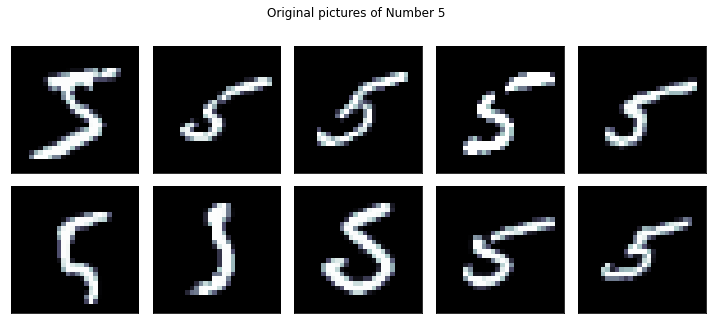

In [ ]:
# Original Data 시각화

k = 0
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(five_feat.iloc[k,:].values.reshape(28,28), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("Original pictures of Number 5")
plt.tight_layout()
plt.show()

* PCA Data (Dimensions 64)

In [ ]:
pca_v = PCA(n_components=64)
five_feat_p = pca_v.fit_transform(five_feat)
five_feat_p.shape

(6313, 64)

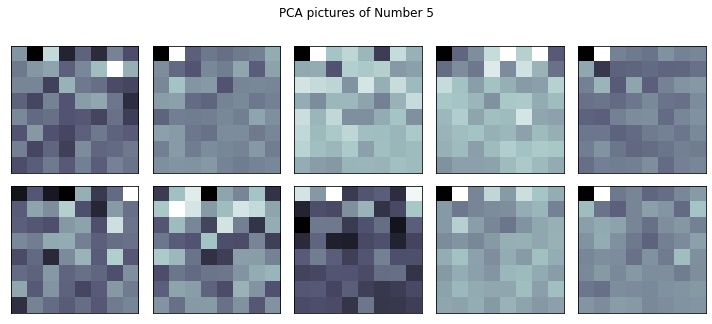

In [ ]:
# PCA Data 형태 시각화

k = 0
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(five_feat_p[k].reshape(6,6), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("PCA pictures of Number 5")
plt.tight_layout()
plt.show()

안타깝게도 형태를 알아볼 수가 없다,,, mnist data 자체가 엄청나게 정교한 picture가 아니기 때문이라는 생각이 든다 ㅠ ㅠ  
그렇다면 64차원으로 압축한 데이터셋을 다시 784차원으로 복원했을 때 얼마나 유지가 되는지 파악해보자.

In [ ]:
five_feat_r = pca_v.inverse_transform(five_feat_p) # MNIST 데이터셋을 64차원으로 압축하고 다시 784차원으로 복원한 데이터셋 
five_feat_r.shape

(6313, 784)

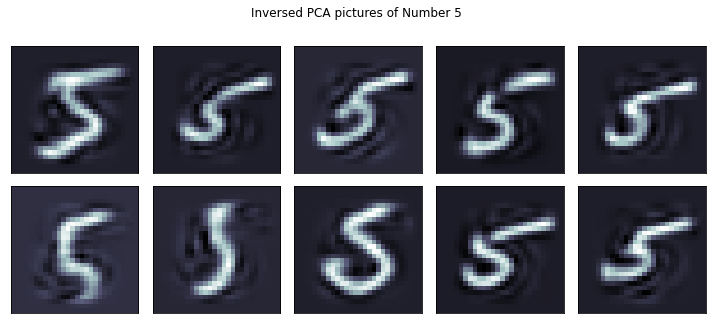

In [ ]:
# PCA Data에서 복원한 Data 시각화

k = 0
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(five_feat_r[k].reshape(28,28), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("Inversed PCA pictures of Number 5")
plt.tight_layout()
plt.show()

완벽하게 복원된 것은 아니지만, 차원을 784차원에서 64차원으로 줄였음을 고려했을 때 꽤나 잘 복원됐다고 생각할 수 있다.
적어도 숫자 5를 구분할 수 있는 정도로는 복원되었기 때문이다.

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

#### RandomForest with Original data (Dimension 784)

In [ ]:
rf_original = RandomForestClassifier(n_estimators=100)
rf_o0 = time.time()
rf_original.fit(X_train, y_train)
rf_o1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(rf_o1 - rf_o0))

Training Time : 42.5680s


In [ ]:
rf_pred_original = rf_original.predict(X_test)
rf_accuracy_original = accuracy_score(y_test, rf_pred_original)
rf_accuracy_original

0.9680714285714286

#### RandomForest with PCA data (Dimension 43)

In [ ]:
rf_pca = RandomForestClassifier(n_estimators=100)
rf_p0 = time.time()
rf_pca.fit(X_train_pca, y_train)
rf_p1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(rf_p1-rf_p0))

Training Time : 54.9353s


In [ ]:
rf_pred_pca = rf_pca.predict(X_test_pca)
rf_accuracy_pca = accuracy_score(y_test, rf_pred_pca)
rf_accuracy_pca

0.9542857142857143

#### RandomForest with LDA data  (Dimension 5)

In [ ]:
rf_lda = RandomForestClassifier(n_estimators=100)
rf_l0 = time.time()
rf_lda.fit(X_train_lda, y_train)
rf_l1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(rf_l1-rf_l0))

Training Time : 18.7702s


In [ ]:
rf_pred_lda = rf_lda.predict(X_test_lda)
rf_accuracy_lda = accuracy_score(y_test, rf_pred_lda)
rf_accuracy_lda

0.8420714285714286

#### RandomForest with LDA data  (Dimension 43)

In [ ]:
rf_extra = RandomForestClassifier(n_estimators=100)
rf_e0 = time.time()
rf_extra.fit(X_train_extra, y_train)
rf_e1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(rf_e1-rf_e0))

Training Time : 28.3391s


In [ ]:
rf_pred_extra = rf_extra.predict(X_test_extra)
rf_accuracy_extra = accuracy_score(y_test, rf_pred_extra)
rf_accuracy_extra

0.9132142857142858

### LogisticRegression

#### LogisticRegression with Original data (Dimension 784)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_original = LogisticRegression()
lr_o0 = time.time()
lr_original.fit(X_train, y_train)
lr_o1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(lr_o1-lr_o0))

Training Time : 31.4176s


In [ ]:
lr_pred_original = lr_original.predict(X_test)
lr_accuracy_original = accuracy_score(y_test, lr_pred_original)
lr_accuracy_original

0.9202142857142858

#### LogisticRegression with PCA data (Dimension 43)

In [ ]:
lr_pca = LogisticRegression()
lr_p0 = time.time()
lr_pca.fit(X_train_pca, y_train)
lr_p1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(lr_p1-lr_p0))

Training Time : 7.9539s


In [ ]:
lr_pred_pca = lr_pca.predict(X_test_pca)
lr_accuracy_pca = accuracy_score(y_test, lr_pred_pca)
lr_accuracy_pca

0.9045

#### LogisticRegression with LDA data (Dimension 5)

In [ ]:
lr_lda = LogisticRegression()
lr_l0 = time.time()
lr_lda.fit(X_train_lda, y_train)
lr_l1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(lr_l1-lr_l0))

Training Time : 4.7690s


In [ ]:
lr_pred_lda = lr_lda.predict(X_test_lda)
lr_accuracy_lda = accuracy_score(y_test, lr_pred_lda)
lr_accuracy_lda

0.8294285714285714

#### LogisticRegression with LDA data (Dimension 43)

In [ ]:
lr_extra = LogisticRegression()
lr_e0 = time.time()
lr_extra.fit(X_train_extra, y_train)
lr_e1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(lr_e1-lr_e0))

Training Time : 4.2206s


In [ ]:
lr_pred_extra = lr_extra.predict(X_test_extra)
lr_accuracy_extra = accuracy_score(y_test, lr_pred_extra)
lr_accuracy_extra

0.8852857142857142

### SVM

In [ ]:
from sklearn.svm import SVC

#### SVM with original data (Dimension 784)

In [ ]:
svm_original = SVC()
svm_o0 = time.time()
svm_original.fit(X_train, y_train)
svm_o1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(svm_o1 - svm_o0))

Training Time : 495.2520s


In [ ]:
svm_pred_original = svm_original.predict(X_test)
svm_accuracy_original = accuracy_score(y_test, svm_pred_original)
svm_accuracy_original

0.9770714285714286

#### SVM with PCA data (Dimension 43)

In [ ]:
svm_pca = SVC()
svm_p0 = time.time()
svm_pca.fit(X_train_pca, y_train)
svm_p1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(svm_p1 - svm_p0))

Training Time : 36.5321s


In [ ]:
svm_pred_pca = svm_pca.predict(X_test_pca)
svm_accuracy_pca = accuracy_score(y_test, svm_pred_pca)
svm_accuracy_pca

0.9806428571428571

#### SVM with LDA data (Dimension 5)

In [ ]:
svm_lda = SVC()
svm_l0 = time.time()
svm_lda.fit(X_train_lda, y_train)
svm_l1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(svm_l1 - svm_l0))

Training Time : 23.3026s


In [ ]:
svm_pred_lda = svm_lda.predict(X_test_lda)
svm_accuracy_lda = accuracy_score(y_test, svm_pred_lda)
svm_accuracy_lda

0.8467142857142858

#### SVM with LDA data (Dimension 43)

In [ ]:
svm_extra = SVC()
svm_e0 = time.time()
svm_extra.fit(X_train_extra, y_train)
svm_e1 = time.time()

In [ ]:
print('Training Time : {:.4f}s'.format(svm_e1 - svm_e0))

Training Time : 18.0754s


In [ ]:
svm_pred_extra = svm_extra.predict(X_test_extra)
svm_accuracy_extra = accuracy_score(y_test, svm_pred_extra)
svm_accuracy_extra

0.9171428571428571

## Final Result

### RandomForest  
  
  
Data | Dimension | Training Time (s) | Accuracy
:-:|:-:|:-:|:-:
Original| 784 | 42.568 | 0.968
PCA | 43 | 54.953 | 0.954
LDA | 5 | 18.77 | 0.842
LDA | 43 | 28.339 | 0.913

### LogisticRegression  
  
  
Data | Dimension | Training Time (s) | Accuracy
:-:|:-:|:-:|:-:
Original| 784 | 31.417 | 0.92
PCA | 43 | 7.954 | 0.904
LDA | 5 | 4.769 | 0.829
LDA | 43 | 4.22 | 0.885

### SVM
  
Data | Dimension | Training Time (s) | Accuracy
:-:|:-:|:-:|:-:
Original| 784 | 495.252 | 0.977
PCA | 43 | 36.532 | 0.9806
LDA | 5 | 23.302 | 0.8467
LDA | 43 | 18.075 | 0.9171

위 결과를 통해 알 수 있는 것은 다음과 같다.  
  
1. 차원 축소를 한다고 해서 모델 성능이 무조건 좋아지는 것은 아니다. 이건 사용하는 모델과 데이터셋에 따라 다르다고 판단된다. (ex. RandomForest를 사용했을 때를 보면, PCA 데이터를 사용했을 때 훈련 시간도 증가하고 정확도도 낮아졌다.) 

2. Support Vector Machine 처럼 training이 오래 걸리는 모델을 활용할 때는 차원을 축소하는 것이 좋다. 결과적으로 시간이 덜 걸릴 뿐만 아니라 Accuracy가 높아지기 때문이다. (차원을 너무 줄이지만 않는다면)  
  
3. 차원의 수가 동일할 때, 위 결과에서는 PCA가 LDA보다 훈련 시간은 더 걸렸지만 정확도는 높았다.  

## TSNE로 MINST 데이터 시각화 해보기

시간 관계상 전체 데이터가 아닌 10000개의 데이터에 대해서만 시각화를 진행해보도록 한다.

In [9]:
np.random.seed(42)
idx = np.random.permutation(60000)[:10000]

X = X[idx] ; y = y[idx]

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42) # 2차원으로 축소
X_reduced = tsne.fit_transform(X)

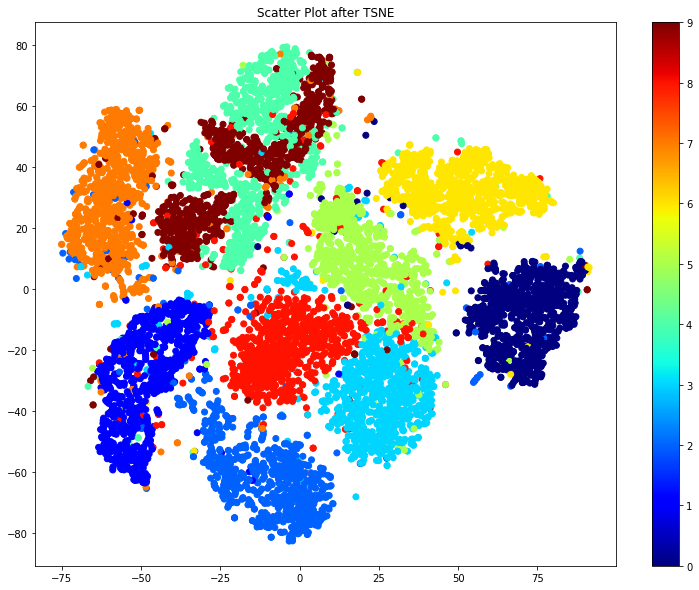

In [12]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap='jet')
plt.colorbar()
plt.title('Scatter Plot after TSNE')
plt.show()

TSNE로 2차원으로 축소한 뒤 그래프로 나타낸 결과, 분류 결과가 썩 좋아보이지는 않는다. 특히 4와 9의 경우 분류가 매우 잘안되어 있다고 판단할 수 있다. 